# Principal Component Analysis with Cancer Data

In [2]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [3]:
cancer_df = pd.read_csv("breast-cancer-wisconsin-data.csv")
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [128]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
#Bare Nuclei data is of type object
cancer_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
cancer_df.shape

(699, 11)

In [6]:
cancer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [132]:
# Bare Nuclei is not described as it has some interger value, which need to be treated
# all attributes have values between 1 to 10 
# Mitoses attribute has valie 1 for 75% or morw patients 
# except ClumpThickness attribute or all other attributes are looking left skewed

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [178]:
# We could see "?" values in column, this should be removed from data set
# Check for missing value in any other column
# All the attributes are having same number of values
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having ?
non_real_count = cancer_df[cancer_df["Bare Nuclei"] == "?"]
non_real_count.shape

(16, 11)

In [9]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values - Imputing with mode value
bare_nuclei_mode = cancer_df["Bare Nuclei"].mode()
cancer_df.replace("?", bare_nuclei_mode[0], inplace=True)

In [10]:
#Checking rows count with value ?
cancer_df[cancer_df["Bare Nuclei"] == "?"].shape

(0, 11)

In [14]:
#Changing Bare Nuclei attribute type to integer
cancer_df = cancer_df.astype({"Bare Nuclei":int})
cancer_df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [273]:
cancer_df.drop_duplicates(inplace=True)
cancer_df.shape

(690, 11)

In [22]:
#Duplicate row count
cancer_df[cancer_df.duplicated()].shape

(9, 11)

In [27]:
#Remove duplicate rows
cancer_df.drop_duplicates(inplace=True)
cancer_df[cancer_df.duplicated()].shape

(0, 11)

In [28]:
#Number of rows remaining after dropping duplicates
cancer_df.shape

(690, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [182]:
# Check for correlation of variable
cancer_df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.620526,0.633880,0.482517,0.681063
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.343769,0.427490,1.000000,0.423947
Class,-0.080084,0.716812,0.817586,0.817551,0.701175,0.681063,0.756736,0.715363,0.423947,1.000000


In [102]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# bland chromatin has good correlation with all other attributes except Mitoses
# Target variable shows high correlation with most of these variables

In [29]:
#Dropping ID attribute which is not relevant 
#Dropping target attribute/column Class too as its not going to be input for our algo
cancer_df.drop(columns=['ID','Class'], inplace=True, axis=0)
cancer_df

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


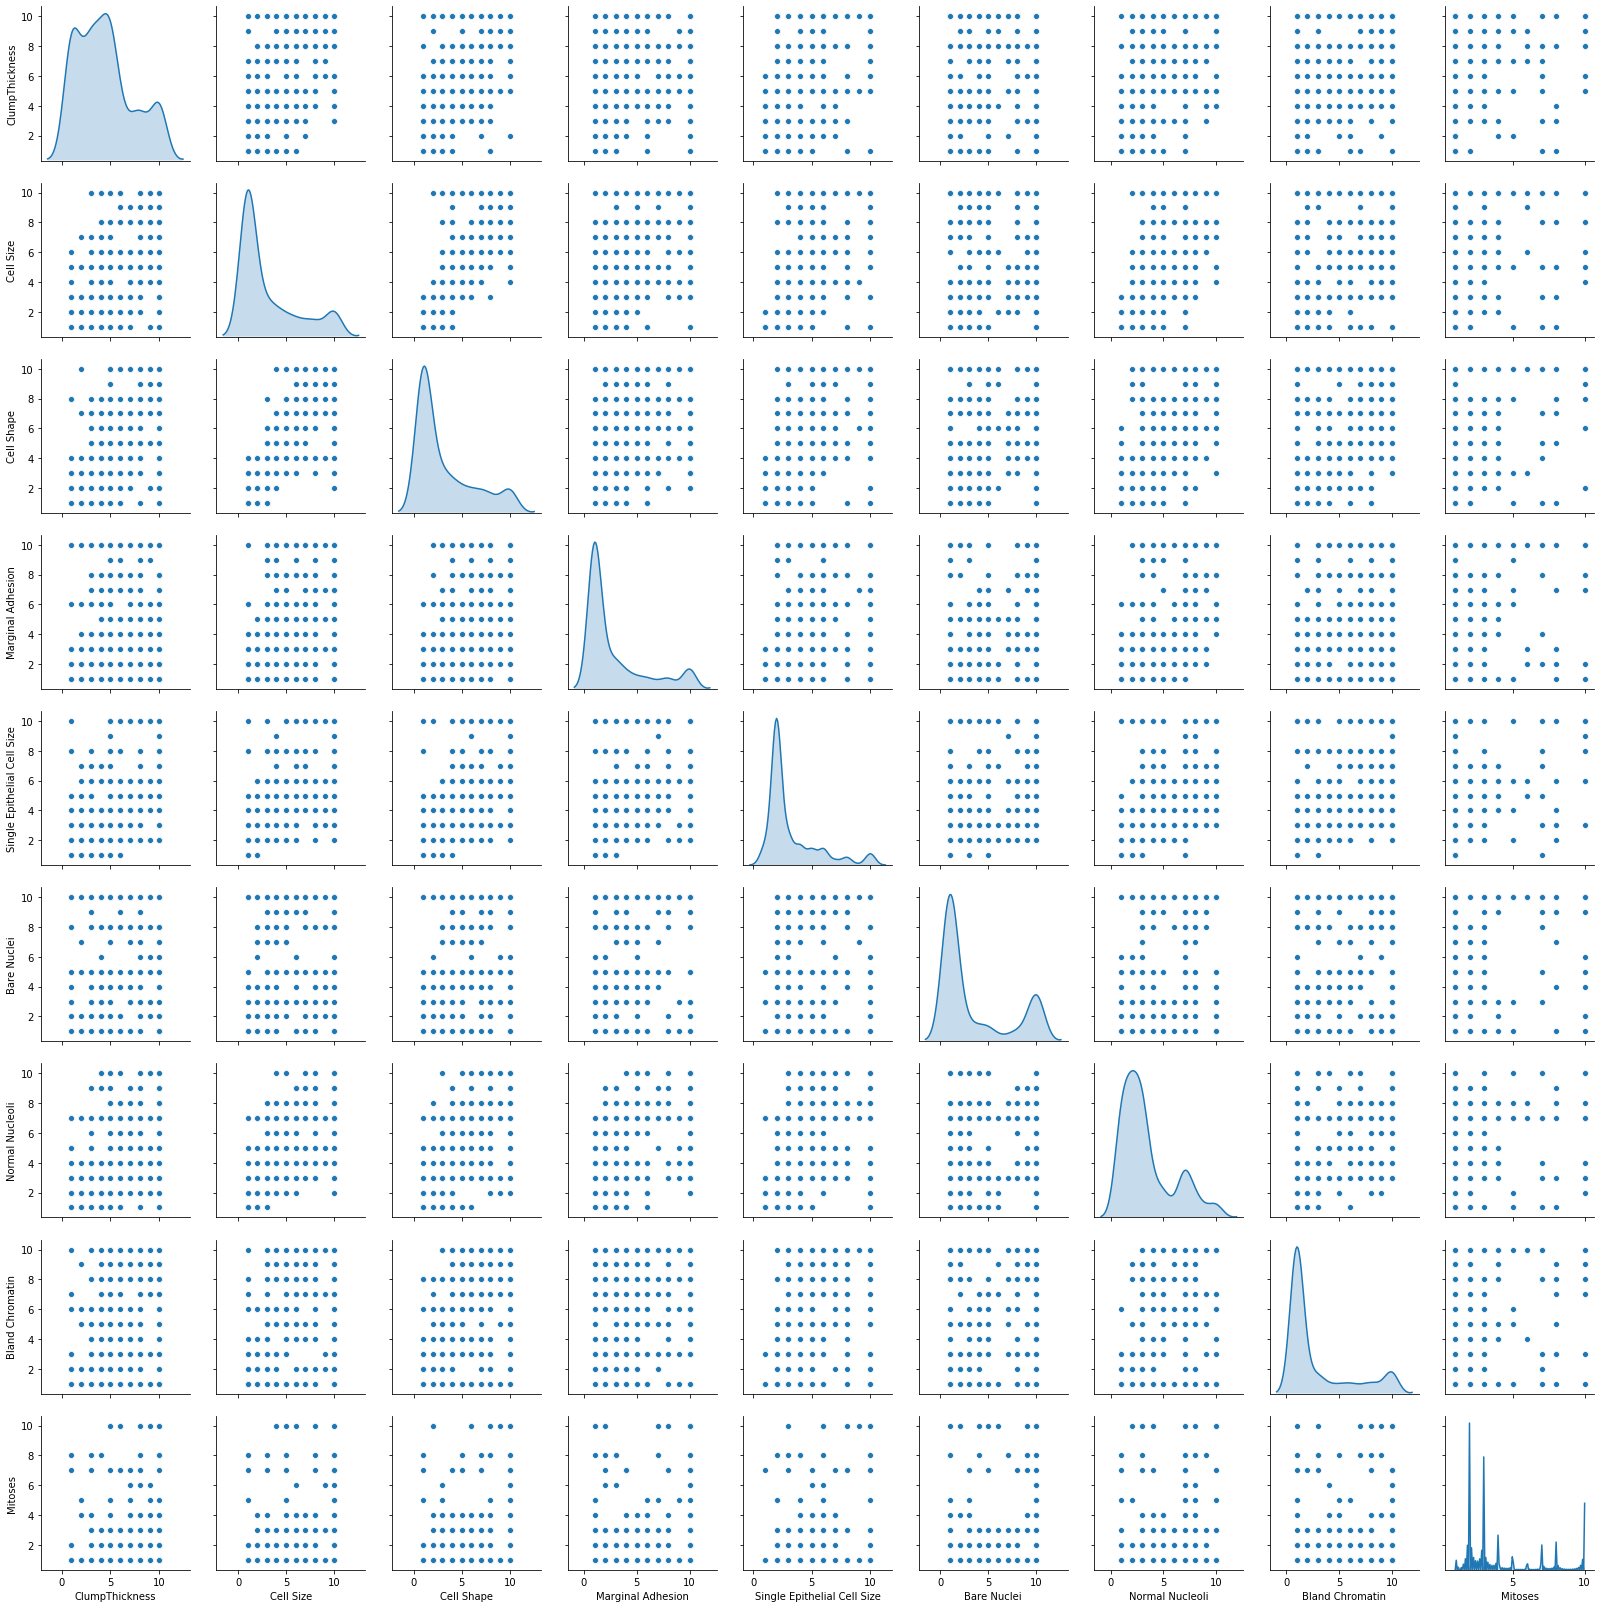

In [275]:
#Let us check for pair plots
sns.pairplot(cancer_df,diag_kind = 'kde')

In [140]:
# All attributes are multinomial, lot of noise in the data
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

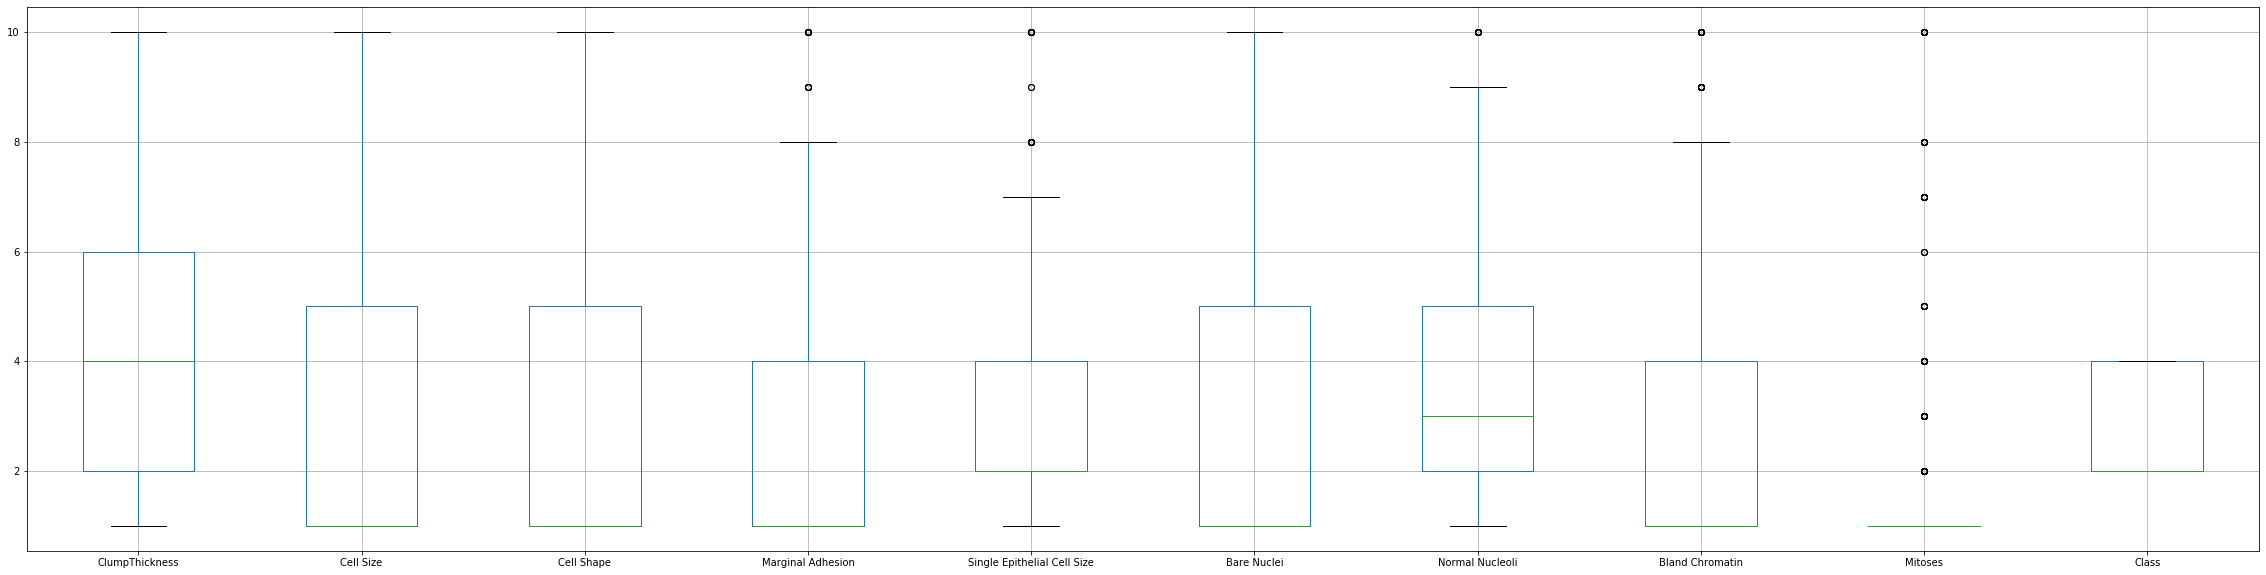

In [242]:
# We could see most of the outliers are now removed.
cancer_df.boxplot(figsize=(40,10))

In [57]:
Q1 = cancer_df.quantile(0.25)
Q3 = cancer_df.quantile(0.75)
mean = cancer_df.mean()
IQR = Q3 - Q1
print(IQR)
print(mean)

ClumpThickness                 4.0
Cell Size                      4.0
Cell Shape                     4.0
Marginal Adhesion              2.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    4.0
Normal Nucleoli                3.0
Bland Chromatin                3.0
dtype: float64
ClumpThickness                 4.428986
Cell Size                      3.133333
Cell Shape                     3.204348
Marginal Adhesion              2.052174
Single Epithelial Cell Size    3.213043
Bare Nuclei                    3.482609
Normal Nucleoli                3.436232
Bland Chromatin                2.885507
dtype: float64


In [37]:
#Mitoses IQR is zero, there is no range, no variance in value, hence dropping column
IQR['Mitoses']

0.0

In [38]:
cancer_df.drop(columns=["Mitoses"], inplace=True, axis=0)

In [58]:
#Missed 690-561=129 rows because of outliers cleaning
#Outliers could be replaced with mean, median or mode value
cancer_df_treated = cancer_df[~((cancer_df < (Q1 - 1.5 * IQR)) |(cancer_df > (Q3 + 1.5 * IQR))).any(axis=1)]
cancer_df_treated.shape

(561, 8)

In [59]:
#standardizing column values
from scipy.stats import zscore
cancer_df = cancer_df.apply(zscore)

In [60]:
cancer_df.head(10)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin
0,0.202823,-0.701698,-0.745040,-0.560427,-0.551542,-0.686858,-0.178616,-0.615082
1,0.202823,0.285065,0.268920,1.570123,1.721838,1.803153,-0.178616,-0.288866
2,-0.507572,-0.701698,-0.745040,-0.560427,-0.551542,-0.410190,-0.178616,-0.615082
3,0.558020,1.600748,1.620866,-0.560427,-0.096866,0.143146,-0.178616,1.342211
4,-0.152375,-0.701698,-0.745040,0.504848,-0.551542,-0.686858,-0.178616,-0.615082
5,1.268415,2.258590,2.296839,3.168036,1.721838,1.803153,2.278096,1.342211
6,-1.217967,-0.701698,-0.745040,-0.560427,-0.551542,1.803153,-0.178616,-0.615082
7,-0.862769,-0.701698,-0.407053,-0.560427,-0.551542,-0.686858,-0.178616,-0.615082
8,-0.862769,-0.701698,-0.745040,-0.560427,-0.551542,-0.686858,-0.997520,-0.615082
9,-0.152375,-0.372777,-0.745040,-0.560427,-0.551542,-0.686858,-0.588068,-0.615082


# Q6 Create a covariance matrix for identifying Principal components

In [61]:
# PCA
# Step 1 - Create covariance matrix
cancer_df_cov_matrix = np.cov(cancer_df.T)
print('Covariance Matrix \n%s', cancer_df_cov_matrix)

Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.38210551 0.51800374 0.59150555
  0.56187702 0.53628373]
 [0.64410677 1.00145138 0.9066632  0.51699237 0.74806589 0.68556472
  0.76073447 0.7281282 ]
 [0.65453792 0.9066632  1.00145138 0.48458778 0.71527957 0.70518656
  0.73964761 0.72557104]
 [0.38210551 0.51699237 0.48458778 1.00145138 0.43174758 0.48093753
  0.50590944 0.47035352]
 [0.51800374 0.74806589 0.71527957 0.43174758 1.00145138 0.58132945
  0.62142658 0.63480034]
 [0.59150555 0.68556472 0.70518656 0.48093753 0.58132945 1.00145138
  0.67373075 0.57900023]
 [0.56187702 0.76073447 0.73964761 0.50590944 0.62142658 0.67373075
  1.00145138 0.67006996]
 [0.53628373 0.7281282  0.72557104 0.47035352 0.63480034 0.57900023
  0.67006996 1.00145138]]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [62]:
eigen_values, eigen_vectors = np.linalg.eig(cancer_df_cov_matrix)
print('Eigen Vectors \n%s', eigen_vectors)
print('\n Eigen Values \n%s', eigen_values)

Eigen Vectors 
%s [[-0.3216811   0.26732164 -0.00698866  0.74160441 -0.20421191  0.48055763
  -0.04186966 -0.02536257]
 [-0.39967251  0.1164318  -0.73067386 -0.13973924  0.44178874  0.05026639
   0.04715085 -0.27086338]
 [-0.39612583  0.16586533  0.67174742 -0.07653783  0.56796754  0.0021387
   0.00371097 -0.18938033]
 [-0.27309035 -0.92861828  0.03578051  0.09695744  0.04412027  0.20936405
   0.07937574 -0.01812052]
 [-0.3487762   0.15070154  0.07227321 -0.43154508 -0.39530768  0.245504
   0.65777637  0.12239077]
 [-0.35029799 -0.00611456 -0.06299951  0.33180324  0.04383645 -0.67931136
   0.22748221  0.49805409]
 [-0.3676011  -0.02631223  0.06233353 -0.06692738 -0.52080239 -0.40468961
  -0.29399761 -0.57824644]
 [-0.35469009  0.04121754 -0.02154526 -0.33827981 -0.095716    0.19284698
  -0.64719158  0.54073115]]

 Eigen Values 
%s [5.3712829  0.66663646 0.0904404  0.53037361 0.26508477 0.4087366
 0.37694537 0.30211093]


# Q8 Find variance and cumulative variance by each eigen vector

In [63]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[ :, i]) for i in range(len(eigen_values))]

In [64]:
total = sum(eigen_values)
varience_explained = [( i /total ) * 100 for i in sorted(eigen_values, reverse=True)]
print("Variance Explained", varience_explained)
cumulative_varience_explained = np.cumsum(varience_explained)
print("Cumulative Variance Explained", cumulative_varience_explained)

Variance Explained [67.04373034785569, 8.320879024323832, 6.620061853232197, 5.101802803292236, 4.704988464985446, 3.770913551616534, 3.3087573822326237, 1.128866572461442]
Cumulative Variance Explained [ 67.04373035  75.36460937  81.98467123  87.08647403  91.79146249
  95.56237605  98.87113343 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [65]:
from sklearn.decomposition import PCA

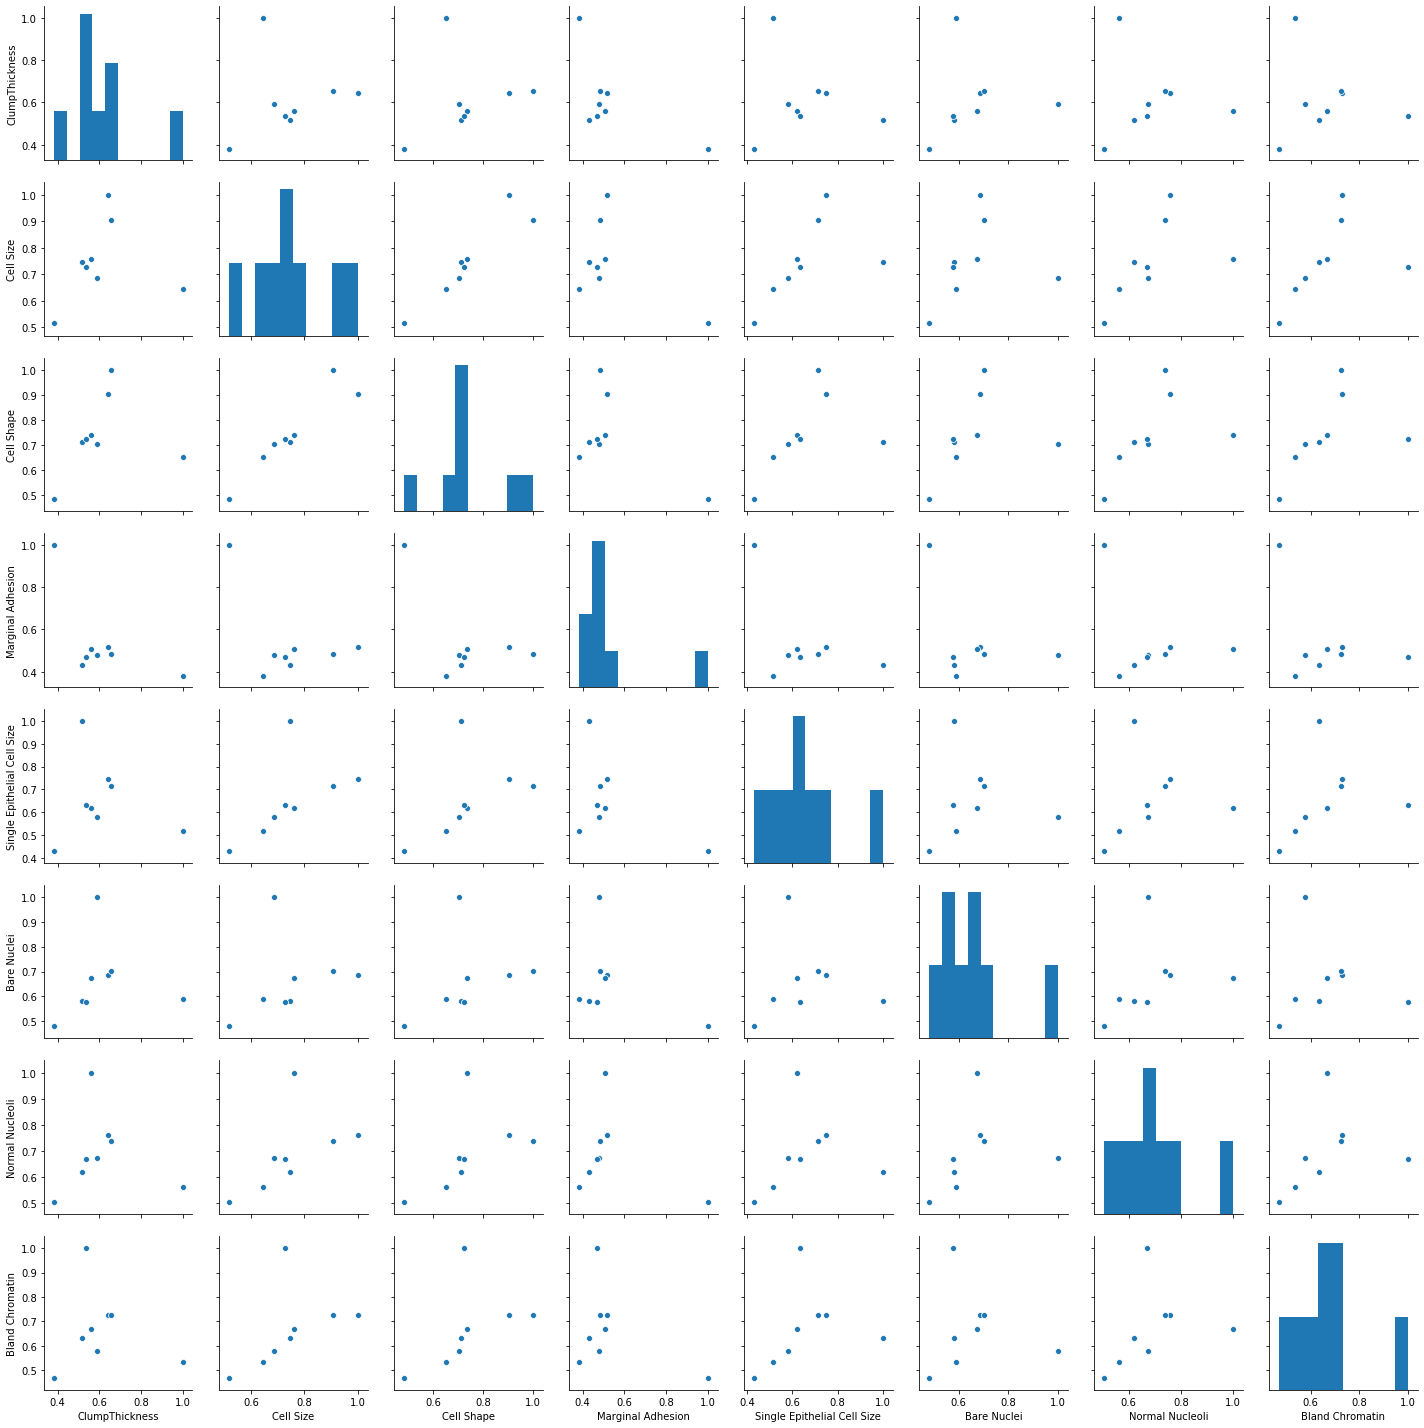

In [69]:
sns.pairplot(cancer_df.corr())

cancer4 = cancer3 - cancer3.mean(axis=0)

In [70]:
pca_model = PCA(n_components=8)
pca_model.fit(cancer_df)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [72]:
X_pca = pca_model.transform(cancer_df)

In [73]:
cancer_df_pc= pd.DataFrame(X_pca, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])
cancer_df_pc.shape

(690, 8)

# Q10 Find correlation between components and features

In [74]:
cancer_df_pc.corr()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
pc1,1.000000e+00,1.451884e-14,1.899827e-16,-4.419610e-16,3.102868e-17,1.821509e-17,-3.213931e-17,4.048153e-16
pc2,1.451884e-14,1.000000e+00,4.932044e-17,6.019485e-17,1.150775e-16,1.938907e-17,9.237855e-17,-7.153058e-17
pc3,1.899827e-16,4.932044e-17,1.000000e+00,-1.965743e-16,-2.565907e-16,-1.231795e-16,1.042124e-16,1.029011e-15
pc4,-4.419610e-16,6.019485e-17,-1.965743e-16,1.000000e+00,-2.360467e-17,-2.283575e-16,-2.552885e-16,2.859965e-17
pc5,3.102868e-17,1.150775e-16,-2.565907e-16,-2.360467e-17,1.000000e+00,3.051191e-16,1.121456e-16,-3.472300e-16
pc6,1.821509e-17,1.938907e-17,-1.231795e-16,-2.283575e-16,3.051191e-16,1.000000e+00,-1.525985e-16,5.483389e-16
pc7,-3.213931e-17,9.237855e-17,1.042124e-16,-2.552885e-16,1.121456e-16,-1.525985e-16,1.000000e+00,1.435489e-16
pc8,4.048153e-16,-7.153058e-17,1.029011e-15,2.859965e-17,-3.472300e-16,5.483389e-16,1.435489e-16,1.000000e+00


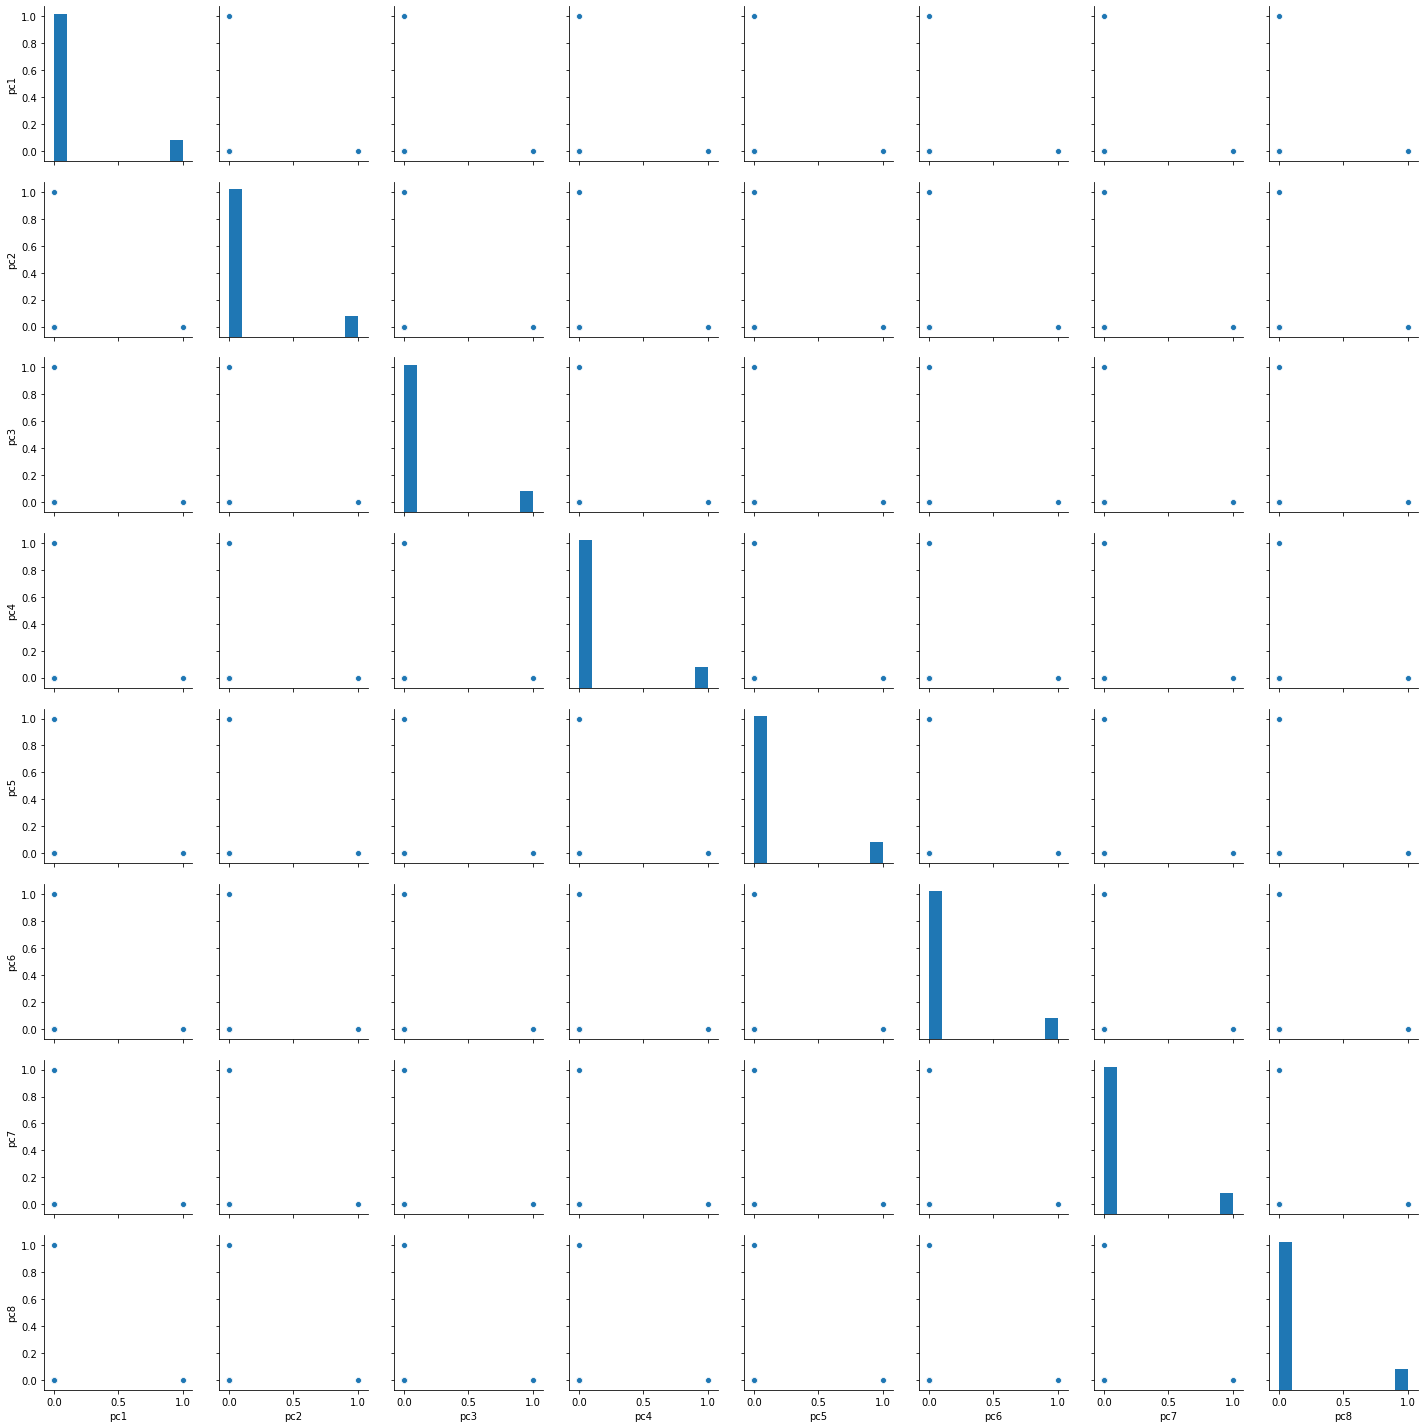

In [76]:
sns.pairplot(cancer_df_pc.corr())

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [87]:
jokes_df = pd.read_excel('jokes.xlsx')
jokes_df.shape

(24983, 101)

In [88]:
jokes_df.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [89]:
joke_ratings=jokes_df.head(200)
joke_ratings.shape

(200, 101)

In [91]:
joke_ratings.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [92]:
joke_ratings.replace(99.00,0,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [93]:
#ratings.pop('NumJokes')
joke_ratings.mean().sort_values(ascending=False).head(10)

NumJokes    70.11000
Joke50       4.05540
Joke36       3.61150
Joke53       3.57150
Joke35       3.22315
Joke29       3.18995
Joke27       3.05240
Joke62       2.86185
Joke49       2.85000
Joke32       2.77955
dtype: float64